# Topic Modeling with SciKit Learn

In this notebook we create a topic model from our corpus  using SciKit Learn's library. We'll save our results and then use another notebook to explore the results.

# Set Up

## Imports

In [1]:
import pandas as pd
import numpy as np
from lib import tapi

## Configuration

In [2]:
tapi.list_corpora()

['airbnb',
 'anphoblacht',
 'arxiv',
 'covid19',
 'jstor_hyperparameter',
 'novels',
 'okcupid',
 'tamilnet',
 'winereviews',
 'yelp',
 'zuboff']

In [3]:
data_prefix = 'winereviews'

In [4]:
db = tapi.Edition(data_prefix)

## Parameters

In [5]:
n_terms = 4000      # Vocabulary size
ngram_range = (1,4) # ngram min and max lengths
n_topics = 20       # Number of topics
max_iter = 5        # Number of iterations for topic model

## Create Tables Object

These tables constitute a "digital critical edition."

# Import Corpus Data

We import a corpus in our standard format

In [6]:
corpus = db.get_corpus()

## Inspect contents

In [7]:
corpus.head(10)

doc_key                                          doc_title  doc_label  \
doc_id                                                                          
0         86023  Lange 2011 Three Hills Cuvée Pinot Noir (Willa...         US   
1         45852  Finca Casa Lo Alto 2008 Reserva Red (Utiel-Req...      Spain   
2         32297  Plantagenet 2004 Omrah Cabernet Sauvignon (Wes...  Australia   
3         43293  Bougrier 2012  Rosé d'Anjou  (Rosé) by Roger Voss     France   
4        118523  Bolla 2007 Le Poiane  (Valpolicella Classico S...      Italy   
5        107875  Château de Lamarque 2010 Barrel sample  (Haut-...     France   
6         16189  Benvenuti 2012 Malvasia Istriana (Istria)  (Ma...    Croatia   
7         71384  Château la Tour Blanche 2009  Sauternes  (Bord...     France   
8        105193  Novelty Hill 2005 Stillwater Creek Vineyard Sé...         US   
9         88425  Paix Sur Terre 2014 The Other One Glenrose Vin...         US   

             doc_province  doc_points  doc_price  \
doc_id                                             
0                  Oregon          88       40.0   
1                 Levante          84       35.0   
2       Western Australia          88       15.0   
3            Loire Valley          84       13.0   
4                  Veneto          87       14.0   
5                Bordeaux          89        NaN   
6                  Istria          90       17.0   
7                Bordeaux          95        NaN   
8              Washington          92       16.0   
9              California          93       52.0   

                                              doc_content  \
doc_id                                                      
0       A tart, astringent Pinot, it needs a bit more ...   
1       The cola and licorice aromas are candied and e...   
2       A good value, this starts off a little shaky t...   
3       Typical, light and sweet rosé, fruity with bri...   
4       If you aren't familiar with Ripasso (a hybrid ...   
5       88-90 Soft, ripe, smooth, with delicious acidi...   
6       Heady aromas of lemon blossom, jasmine and ora...   
7       This is rich, exuding delicious sweetness, wit...   
8       This is just about perfect Sémillon— the gorge...   
9       This is the winning Mourvèdre of the vintage f...   

                                             doc_original  \
doc_id                                                      
0       A tart, astringent Pinot, it needs a bit more ...   
1       The cola and licorice aromas are candied and e...   
2       A good value, this starts off a little shaky t...   
3       Typical, light and sweet rosé, fruity with bri...   
4       If you aren't familiar with Ripasso (a hybrid ...   
5       88-90 Soft, ripe, smooth, with delicious acidi...   
6       Heady aromas of lemon blossom, jasmine and ora...   
7       This is rich, exuding delicious sweetness, wit...   
8       This is just about perfect Sémillon— the gorge...   
9       This is the winning Mourvèdre of the vintage f...   

                          doc_variety         doc_taster  \
doc_id                                                     
0                          Pinot Noir       Paul Gregutt   
1                           Red Blend  Michael Schachner   
2                  Cabernet Sauvignon     Joe Czerwinski   
3                                Rosé         Roger Voss   
4       Corvina, Rondinella, Molinara                NaN   
5            Bordeaux-style Red Blend         Roger Voss   
6                   Malvasia Istriana       Jeff Jenssen   
7          Bordeaux-style White Blend         Roger Voss   
8                            Sémillon       Paul Gregutt   
9                           Mourvèdre      Matt Kettmann   

                                                doc_place  
doc_id                                                     
0           US Oregon Willamette Valley Willamette Valley  
1                            Spain Levante 

In [8]:
corpus.shape

(10000, 11)

In [9]:
corpus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   doc_key       10000 non-null  int64  
 1   doc_title     10000 non-null  object 
 2   doc_label     9993 non-null   object 
 3   doc_province  9993 non-null   object 
 4   doc_points    10000 non-null  int64  
 5   doc_price     9301 non-null   float64
 6   doc_content   10000 non-null  object 
 7   doc_original  10000 non-null  object 
 8   doc_variety   10000 non-null  object 
 9   doc_taster    7945 non-null   object 
 10  doc_place     10000 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 937.5+ KB


# Create Bag-of-Words 

ie. a __Count Vector Space__

We use Scikit Learn's CountVectorizer to convert our corpus of documents into a document-term vector space of word counts.

In [10]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [11]:
count_engine = CountVectorizer(max_features=n_terms, stop_words='english', ngram_range=ngram_range)
count_model = count_engine.fit_transform(corpus.doc_content)

In [12]:
# corpus.doc_content

## Get Generated VOCAB

In [13]:
db.VOCAB = pd.DataFrame(count_engine.get_feature_names(), columns=['term_str'])
db.VOCAB = db.VOCAB.set_index('term_str')
db.VOCAB['ngram_len'] = None # To be added later

In [14]:
db.VOCAB.sample(10)

ngram_len
term_str                    
grapes                  None
wine bit                None
oak finish              None
layered                 None
blackberry cassis       None
dense concentrated      None
slowly                  None
saline note             None
things                  None
ripe bodied             None

## Get Generated BOW

We do this just to show what the counter vectorizer produced. `DTM` stands for documet-term matrix. We convert this sparse matrix into a "thin" dataframe that keeps only terms with counts for each document. 

In [15]:
db.DTM = pd.DataFrame(count_model.toarray(), index=corpus.index, columns=db.VOCAB.index)
db.BOW = db.DTM.stack().to_frame('n')
db.BOW = db.BOW[db.BOW.n > 0]

In [16]:
db.DTM.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Columns: 4000 entries, 000 to zippy acidity
dtypes: int64(4000)
memory usage: 305.5 MB


In [17]:
db.BOW.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 267755 entries, (0, 'accented') to (9999, 'wine')
Columns: 1 entries, n to n
dtypes: int64(1)
memory usage: 3.5+ MB


## Compute TF-IDF

In [18]:
tfidf_engine = TfidfTransformer()
tfidf_model = tfidf_engine.fit_transform(count_model)

In [19]:
db.TFIDF = pd.DataFrame(tfidf_model.toarray(), index=corpus.index, columns=db.VOCAB.index)

In [20]:
db.BOW['tfidf'] = db.TFIDF.stack()

In [21]:
db.BOW

n     tfidf
doc_id term_str                
0      accented     1  0.212521
       astringent   1  0.219259
       barrel       1  0.183510
       bit          1  0.164003
       bottle       1  0.198999
...                ..       ...
9999   showing      1  0.160109
       stone        1  0.161591
       stone fruit  1  0.177589
       texture      1  0.118262
       wine         1  0.059593

[267755 rows x 2 columns]

## Add Features to VOCAB

In [22]:
db.VOCAB['ngram_len'] = db.VOCAB.apply(lambda x: len(x.name.split()), 1)
db.VOCAB['n'] = db.DTM.sum()
db.VOCAB['tfidf_mean'] = db.TFIDF.mean()

In [23]:
db.VOCAB

ngram_len    n  tfidf_mean
term_str                                 
000                    1   20    0.000502
000 cases              2   14    0.000366
10                     1  141    0.002449
10 merlot              2   14    0.000324
10 years               2   30    0.000687
...                  ...  ...         ...
zin                    1   59    0.001335
zinfandel              1   89    0.001958
zingy                  1   19    0.000526
zippy                  1   43    0.001046
zippy acidity          2   12    0.000330

[4000 rows x 3 columns]

<AxesSubplot:>

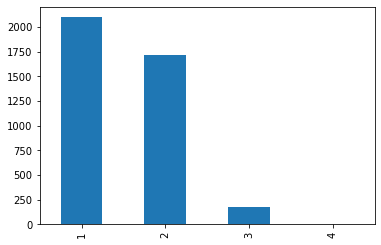

In [24]:
db.VOCAB.ngram_len.value_counts().plot.bar()

# Generate Topic Models

We run Scikit Learn's [LatentDirichletAllocation algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html#sklearn.decomposition.LatentDirichletAllocation) and extract the THETA and PHI tables.

In [25]:
from sklearn.decomposition import LatentDirichletAllocation as LDA, NMF

## Using LDA

In [26]:
lda_engine = LDA(n_components=n_topics, max_iter=max_iter, learning_offset=50., random_state=0)

### THETA

In [27]:
db.THETA = pd.DataFrame(lda_engine.fit_transform(count_model), index=corpus.index)
db.THETA.index.name = 'doc_id'
db.THETA.columns.name = 'topic_id'

In [28]:
db.THETA.sample(20).T.style.background_gradient()

### PHI

In [29]:
db.PHI = pd.DataFrame(lda_engine.components_, columns=db.VOCAB.index)
db.PHI.index.name = 'topic_id'
db.PHI.columns.name  = 'term_str'

In [30]:
db.PHI.T.head().style.background_gradient()

### Create Topic Glosses

In [31]:
n_top_words = 7

In [32]:
db.TOPICS = db.PHI.stack()\
    .to_frame('weight')\
    .groupby('topic_id')\
    .apply(lambda x: x.weight.sort_values(ascending=False)\
               .head(n_top_words)\
               .reset_index()\
               .drop('topic_id',1)\
               .term_str)

In [33]:
db.TOPICS

term_str         0          1                   2              3            4  \
topic_id                                                                        
0             nose      fruit              palate          shows     bottling   
1            fruit       wine             flavors          stone  stone fruit   
2             ripe    acidity               fruit           wine       bright   
3             wine      drink             acidity         fruits         ripe   
4          flavors    acidity                wine         finish        peach   
5             wine      fruit             acidity          blanc      flavors   
6           palate     cherry             tannins          black       aromas   
7            fruit    flavors              finish           wine        black   
8             wine    tannins               black           plum      flavors   
9            fruit     aromas              palate           wine        white   
10           black    flavors              aromas      chocolate       palate   
11          bodied       wine              medium  medium bodied       cherry   
12        cabernet  sauvignon  cabernet sauvignon          blend       merlot   
13            wine      fruit                 oak       cabernet        blend   
14          cherry    flavors                wine          pinot       aromas   
15           apple     palate              finish         citrus       aromas   
16           fruit     aromas             flavors          dried         wine   
17          palate       nose                wine          fresh        light   
18            wine    flavors                ripe        tannins         rich   
19         flavors     finish              aromas          berry       palate   

term_str              5                6  
topic_id                                  
0                aromas          flavors  
1                aromas            blend  
2               flavors            drink  
3               tannins            fruit  
4                 lemon           palate  
5               texture  sauvignon blanc  
6             alongside           offers  
7         fruit flavors              oak  
8                 berry       blackberry  
9                finish              red  
10                 plum           cherry  
11              flavors            fruit  
12                franc   cabernet franc  
13              tannins            black  
14                black             noir  
15                green            fresh  
16              tannins             lead  
17               finish            lemon  
18                fruit            drink  
19                 plum              oak

In [34]:
db.TOPICS['topwords'] = db.TOPICS.apply(lambda x: str(x.name) + ' ' + ', '.join(x), 1)

In [35]:
db.TOPICS

term_str         0          1                   2              3            4  \
topic_id                                                                        
0             nose      fruit              palate          shows     bottling   
1            fruit       wine             flavors          stone  stone fruit   
2             ripe    acidity               fruit           wine       bright   
3             wine      drink             acidity         fruits         ripe   
4          flavors    acidity                wine         finish        peach   
5             wine      fruit             acidity          blanc      flavors   
6           palate     cherry             tannins          black       aromas   
7            fruit    flavors              finish           wine        black   
8             wine    tannins               black           plum      flavors   
9            fruit     aromas              palate           wine        white   
10           black    flavors              aromas      chocolate       palate   
11          bodied       wine              medium  medium bodied       cherry   
12        cabernet  sauvignon  cabernet sauvignon          blend       merlot   
13            wine      fruit                 oak       cabernet        blend   
14          cherry    flavors                wine          pinot       aromas   
15           apple     palate              finish         citrus       aromas   
16           fruit     aromas             flavors          dried         wine   
17          palate       nose                wine          fresh        light   
18            wine    flavors                ripe        tannins         rich   
19         flavors     finish              aromas          berry       palate   

term_str              5                6  \
topic_id                                   
0                aromas          flavors   
1                aromas            blend   
2               flavors            drink   
3               tannins            fruit   
4                 lemon           palate   
5               texture  sauvignon blanc   
6             alongside           offers   
7         fruit flavors              oak   
8                 berry       blackberry   
9                finish              red   
10                 plum           cherry   
11              flavors            fruit   
12                franc   cabernet franc   
13              tannins            black   
14                black             noir   
15                green            fresh   
16              tannins             lead   
17               finish            lemon   
18                fruit            drink   
19                 plum              oak   

term_str                                           topwords  
topic_id                                                     
0         0 nose, fruit, palate, shows, bottling, aromas...  
1         1 fruit, wine, flavors, stone, stone fruit, ar...  
2         2 ripe, acidity, fruit, wine, bright, flavors,...  
3         3 wine, drink, acidity, fruits, ripe, tannins,...  
4         4 flavors, acidity, wine, finish, peach, lemon...  
5         5 wine, fruit, acidity, blanc, flavors, textur...  
6         6 palate, cherry, tannins, black, aromas, alon...  
7         7 fruit, flavors, finish, wine, black, fruit f...  
8         8 wine, tannins, black, plum, flavors, berry, ...  
9         9 fruit, aromas, palate, wine, white, finish, red  
10        10 black, flavors, aromas, chocolate, palate, ...  
11        11 bodied, wine, medium, medium bodied, cherry...  
12        12 cabernet, sauvignon, cabernet sauvignon, bl...  
13        13 wine, fruit, oak, cabernet, blend, tannins,...  
14        14 cherry, flavors, wine, pinot, aromas, black...  
15        15 apple, palate, finish, citrus, aromas, gree...  
16        16 fruit, aromas, flavors, dried, wine, tannin...  
17        17 palate, nose, wine, fresh, light, finish, l...  
18      

### Add Doc Weights

In [36]:
db.TOPICS['doc_weight_sum'] = db.THETA.sum()

In [37]:
db.TOPICS.iloc[:, 7:].sort_values('doc_weight_sum', ascending=False).style.bar()

## Using NMF

In [38]:
nmf_engine = NMF(n_components=n_topics, init='nndsvd', random_state=1, alpha=.1, l1_ratio=.5)

### THETA

In [39]:
db.THETA_NMF = pd.DataFrame(nmf_engine.fit_transform(tfidf_model), index=corpus.index)
db.THETA_NMF.columns.name = 'topic_id'

In [40]:
db.THETA_NMF.sample(20).style.background_gradient()

### PHI

In [41]:
db.PHI_NMF = pd.DataFrame(nmf_engine.components_, columns=db.VOCAB.index)

In [42]:
db.PHI_NMF.index.name = 'topic_id'
db.PHI_NMF.columns.name = 'term_str'

In [43]:
db.PHI_NMF.T.head().style.background_gradient()

### Topics

In [44]:
db.TOPICS_NMF = db.PHI_NMF.stack()\
    .to_frame('weight')\
    .groupby('topic_id')\
    .apply(lambda x: 
           x.weight.sort_values(ascending=False)\
               .head(n_top_words)\
               .reset_index()\
               .drop('topic_id',1)\
               .term_str)

In [45]:
db.TOPICS_NMF

term_str         0              1                   2               3  \
topic_id                                                                
0             wine         fruits                ripe            rich   
1            crisp          light             acidity           fresh   
2            lemon           lime          lemon lime      grapefruit   
3          tannins      alongside              palate          aromas   
4         cabernet      sauvignon  cabernet sauvignon           blend   
5              red      red berry          red cherry       red fruit   
6            berry         finish                plum         flavors   
7            black   black cherry              cherry          pepper   
8            fruit  fruit flavors             flavors  tropical fruit   
9            sweet        flavors             vanilla            like   
10          bodied         medium       medium bodied     bodied wine   
11            nose         palate               notes     nose palate   
12             oak            new              french      french oak   
13           pinot           noir          pinot noir          cherry   
14             dry           bone            bone dry        dry wine   
15           white          peach         white peach           stone   
16        cherries   blackberries            currants           years   
17           apple          green                pear     green apple   
18           ready    ready drink               drink      wine ready   
19           spice  spice flavors        baking spice          baking   

term_str                   4              5                      6  
topic_id                                                            
0                      drink        tannins                   wood  
1                     bright           wine                 fruity  
2                       zest       riesling                 orange  
3                     cherry         offers          palate offers  
4                     merlot          franc         cabernet franc  
5                 red fruits          berry            red currant  
6                     aromas         herbal                  feels  
7               black pepper     blackberry                currant  
8                black fruit       tropical                 aromas  
9                  pineapple          honey                   soft  
10        medium bodied wine        texture                   wine  
11                    finish          shows               bottling  
12                      aged     new french         new french oak  
13                     silky      raspberry                   cola  
14               dry tannins       wine dry                flavors  
15                    flower         citrus            stone fruit  
16               raspberries           cola  blackberries cherries  
17                apple pear  apple flavors                flavors  
18          wine ready drink           soft                 fruity  
19                    cherry        flavors                vanilla

In [46]:
db.TOPICS_NMF['topwords'] = db.TOPICS_NMF.apply(lambda x: str(x.name) + ' ' + ', '.join(x), 1)

### Add Doc Weights

In [47]:
db.TOPICS_NMF['doc_weight_sum'] = db.THETA_NMF.sum()

In [48]:
db.TOPICS_NMF.iloc[:, 7:].sort_values('doc_weight_sum', ascending=False).style.bar()

# Save the Model

## Keep Corpus Label Info

This is effectively the LIB table.

In [49]:
db.LABELS = corpus[set(corpus.columns.tolist()) - set(['doc_key', 'doc_content', 'doc_original'])]

## Save Tables

In [50]:
db.save_tables()

In [51]:
# See if it worked ...

!ls -l ./db/{data_prefix}*.csv

-rw-r--r--@ 1 rca2t1  staff   9347007 Jun 16 01:19 ./db/winereviews-BOW.csv
-rw-r--r--@ 1 rca2t1  staff  80091190 Jun 16 01:19 ./db/winereviews-DTM.csv
-rw-r--r--@ 1 rca2t1  staff   1832690 Jun 16 01:19 ./db/winereviews-LABELS.csv
-rw-r--r--@ 1 rca2t1  staff   1387059 Jun 16 01:19 ./db/winereviews-PHI.csv
-rw-r--r--@ 1 rca2t1  staff    544306 Jun 16 01:19 ./db/winereviews-PHI_NMF.csv
-rw-r--r--@ 1 rca2t1  staff   4322057 Jun 16 01:19 ./db/winereviews-THETA.csv
-rw-r--r--@ 1 rca2t1  staff   1967524 Jun 16 01:19 ./db/winereviews-THETA_NMF.csv
-rw-r--r--@ 1 rca2t1  staff      2611 Jun 16 01:19 ./db/winereviews-TOPICS.csv
-rw-r--r--@ 1 rca2t1  staff      3015 Jun 16 01:19 ./db/winereviews-TOPICS_NMF.csv
-rw-r--r--@ 1 rca2t1  staff    150779 Jun 16 01:19 ./db/winereviews-VOCAB.csv


In [52]:
db.BOW

n     tfidf
doc_id term_str                
0      accented     1  0.212521
       astringent   1  0.219259
       barrel       1  0.183510
       bit          1  0.164003
       bottle       1  0.198999
...                ..       ...
9999   showing      1  0.160109
       stone        1  0.161591
       stone fruit  1  0.177589
       texture      1  0.118262
       wine         1  0.059593

[267755 rows x 2 columns]